In [1]:
%pylab inline
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import pypot.dynamixel
import pypot.robot
from poppy.creatures import PoppyHumanoid
from explauto.environment import environments


poppy = PoppyHumanoid(simulator='vrep')

for m in poppy.motors:
    m.compliant = False
    m.goto_behavior = 'minjerk'
pos_Head = []
pos_Stand = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

Populating the interactive namespace from numpy and matplotlib


In [2]:
def rest_position():
    poppy.r_shoulder_x.goal_position = 0
    poppy.r_shoulder_y.goal_position = 0
    poppy.r_arm_z.goal_position = 0
    poppy.r_elbow_y.goal_position = 0
    

In [3]:
def app():
    pos_Head.append(poppy.get_object_position('r_forearm_visual','head_visual'))
    pos_Stand.append(poppy.get_object_position('r_forearm_visual'))
    
    sys_load.append(poppy.r_shoulder_x.present_load)
    sys_load.append(poppy.r_shoulder_y.present_load)
    sys_load.append(poppy.r_arm_z.present_load)
    sys_load.append(poppy.r_elbow_y.present_load)
    
    speed.append(poppy.r_shoulder_x.present_speed)
    speed.append(poppy.r_shoulder_y.present_speed)
    speed.append(poppy.r_arm_z.present_speed)
    speed.append(poppy.r_elbow_y.present_speed)
    
    temp.append(poppy.r_shoulder_x.present_temperature)
    temp.append(poppy.r_shoulder_y.present_temperature)
    temp.append(poppy.r_arm_z.present_temperature)
    temp.append(poppy.r_elbow_y.present_temperature)
     
    volt.append(poppy.r_shoulder_x.present_voltage)
    volt.append(poppy.r_shoulder_y.present_voltage)
    volt.append(poppy.r_arm_z.present_voltage)
    volt.append(poppy.r_elbow_y.present_voltage)

In [4]:
def hand_wave(sec=10, rest=0.5):
    t0 = time.time()
    while True:
        
        t1 = time.time()
        if t1-t0 >= sec:
            break

        # run for sec
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 30
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -135
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = -120;
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 0
        
        app()
        TIME.append(t1-t0)
        time.sleep(rest)
    
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 45
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -175
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = -120
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = -65
        
        app()
        TIME.append(t1-t0)
        
        time.sleep(rest)
        app()
        TIME.append(t1-t0)

In [5]:
def hand_shake(sec=3, rest=0.5):

    t0 = time.time()
    
    while True:
        
        t1 = time.time()
        if t1-t0 >= sec:
            break 
        
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 35
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -135
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 90
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 25
        time.sleep(rest-.01)
        
        app()
        poppy.r_shoulder_y.goal_position = 50
        TIME.append(t1-t0)
        time.sleep(rest+0.1)
        
        

In [6]:
rest_position()

In [9]:
# reset arrays
pos_Head = []
pos_Stand = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

In [10]:
hand_wave()
time.sleep(0.25)
rest_position()

In [ ]:
hand_shake()
time.sleep(0.25)
rest_position()

In [9]:
print len(pos_Head)
print len(pos_Stand)
print len(TIME)


99
99
99


In [11]:
print pos_Head_Arr.size
print TIME_Arr.size
print speed_Arr[:,0].size

297
99
99


In [10]:
# formatting into arrays
pos_Head_Arr = np.asarray(pos_Head)
pos_Stand_Arr = np.asarray(pos_Stand)
sys_load_Arr = np.asarray(sys_load)
speed_Arr = np.asarray(speed)
temp_Arr = np.asarray(temp)
volt_Arr = np.asarray(volt)
TIME_Arr = np.asarray(TIME)


sys_load_Arr = sys_load_Arr.reshape((sys_load_Arr.size / 4,4))
speed_Arr = speed_Arr.reshape((speed_Arr.size / 4,4))
temp_Arr = temp_Arr.reshape((temp_Arr.size / 4,4))
volt_Arr = volt_Arr.reshape((volt_Arr.size / 4, 4))

Populating the interactive namespace from numpy and matplotlib


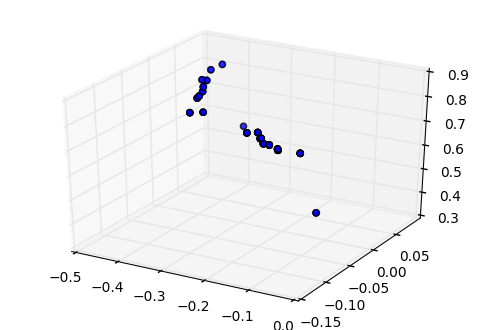

In [18]:
%pylab inline
standard = axes(projection='3d')
standard.scatter(*array(reached_pt_Stand).T)

In [9]:
reached_pt_Head

[[-0.12959513068199158, -0.3137010931968689, 0.09621948003768921],
 [-0.12880434095859528, -0.31402087211608887, 0.09565585851669312],
 [-0.12880434095859528, -0.31402087211608887, 0.09565585851669312],
 [-0.12880434095859528, -0.31402087211608887, 0.09565585851669312],
 [-0.12880434095859528, -0.31402087211608887, 0.09565585851669312],
 [-0.12880434095859528, -0.31402087211608887, 0.09565585851669312],
 [0.1100403368473053, 0.020101189613342285, 0.2777874171733856],
 [0.1100403368473053, 0.020101189613342285, 0.2777874171733856],
 [0.1100403368473053, 0.020101189613342285, 0.2777874171733856],
 [0.1100403368473053, 0.020101189613342285, 0.2777874171733856],
 [0.1100403368473053, 0.020101189613342285, 0.2777874171733856],
 [0.14470955729484558, 0.017097651958465576, 0.019858241081237793],
 [0.14470955729484558, 0.017097651958465576, 0.019858241081237793],
 [0.14470955729484558, 0.017097651958465576, 0.019858241081237793],
 [0.14470955729484558, 0.017097651958465576, 0.01985824108123779

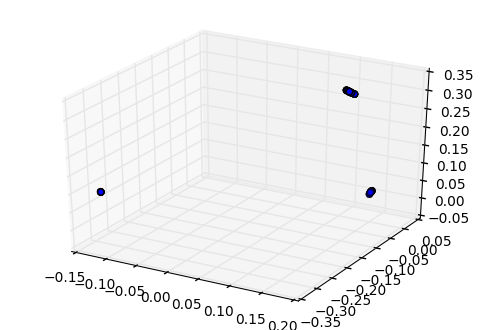

In [19]:
head = axes(projection='3d')
head.scatter(*array(reached_pt_Head).T)

In [21]:
for m in poppy.sensors:
    print m

In [ ]:
reached_pt_Stand = []
reached_pt_Head = []
for m in poppy.motors:
    m.compliant = True
time.sleep(2)
poppy.stop_sync()
poppy.close()